In [4]:
import pandas as pd
import numpy as np

# Data Manipulation

In [5]:
df = pd.read_csv('online_shoppers_intention.csv')

### Reading the Data

In [6]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [7]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [9]:
for i in df.columns:
    k=df[i].nunique()
    print(f'{i} : {k}')

Administrative : 27
Administrative_Duration : 3335
Informational : 17
Informational_Duration : 1258
ProductRelated : 311
ProductRelated_Duration : 9551
BounceRates : 1872
ExitRates : 4777
PageValues : 2704
SpecialDay : 6
Month : 10
OperatingSystems : 8
Browser : 13
Region : 9
TrafficType : 20
VisitorType : 3
Weekend : 2
Revenue : 2


In [10]:
Y=df['Revenue']
X=df.drop('Revenue',axis=1)

## Data preprocesing

Splitting the Numercal and categorical data for standardization and 1-hot encoding 

In [11]:
X_numerical = X.drop(['Month','VisitorType'],axis=1)

In [12]:
X_numerical.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend'],
      dtype='object')

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_numerical)
X_num_scaled.shape #zero mean unit variance standardization

(12330, 15)

In [14]:
X_num_sc=pd.DataFrame(X_num_scaled,columns=list(X_numerical.columns))

In [15]:
X_num_sc.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend
0,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,0.000000,0.000000,0.000,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.002837,0.001000,0.00,0.50,0.0,0.0,0.142857,0.083333,0.000,0.052632,0.0
2,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,0.428571,0.000000,1.000,0.105263,0.0
3,0.0,0.0,0.0,0.0,0.002837,0.000042,0.25,0.70,0.0,0.0,0.285714,0.083333,0.125,0.157895,0.0
4,0.0,0.0,0.0,0.0,0.014184,0.009809,0.10,0.25,0.0,0.0,0.285714,0.166667,0.000,0.157895,1.0


In [16]:
X_scaled = pd.concat([X_num_sc,X[['Month','VisitorType']]],axis=1)

In [17]:
X_scaled.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Month,VisitorType
0,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,0.000000,0.000000,0.000,0.000000,0.0,Feb,Returning_Visitor
1,0.0,0.0,0.0,0.0,0.002837,0.001000,0.00,0.50,0.0,0.0,0.142857,0.083333,0.000,0.052632,0.0,Feb,Returning_Visitor
2,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,0.428571,0.000000,1.000,0.105263,0.0,Feb,Returning_Visitor
3,0.0,0.0,0.0,0.0,0.002837,0.000042,0.25,0.70,0.0,0.0,0.285714,0.083333,0.125,0.157895,0.0,Feb,Returning_Visitor
4,0.0,0.0,0.0,0.0,0.014184,0.009809,0.10,0.25,0.0,0.0,0.285714,0.166667,0.000,0.157895,1.0,Feb,Returning_Visitor


In [18]:
X_scaled_enc=X_scaled #made another variable just to preserve the above one
for i in ['VisitorType']:
    dummies = pd.get_dummies(X_scaled[i]) #1-hot encoding
    dummies.columns=str(i)+'_'+dummies.columns 
    X_scaled_enc = pd.concat([X_scaled_enc,dummies],axis=1)
    X_scaled_enc.drop(i,inplace=True,axis=1)
    


In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le_month = LabelEncoder()
X_scaled_enc['Month'] = le_month.fit_transform(X_scaled_enc['Month'])

In [21]:
X_scaled_enc.head(50)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Month,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.000000,0.000000,0.000000,0.0,0.001418,0.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000,0.000000,0.0,2,0,0,1
1,0.000000,0.000000,0.000000,0.0,0.002837,0.001000,0.000000,0.500000,0.000000,0.0,0.142857,0.083333,0.000,0.052632,0.0,2,0,0,1
2,0.000000,0.000000,0.000000,0.0,0.001418,0.000000,1.000000,1.000000,0.000000,0.0,0.428571,0.000000,1.000,0.105263,0.0,2,0,0,1
3,0.000000,0.000000,0.000000,0.0,0.002837,0.000042,0.250000,0.700000,0.000000,0.0,0.285714,0.083333,0.125,0.157895,0.0,2,0,0,1
4,0.000000,0.000000,0.000000,0.0,0.014184,0.009809,0.100000,0.250000,0.000000,0.0,0.285714,0.166667,0.000,0.157895,1.0,2,0,0,1
5,0.000000,0.000000,0.000000,0.0,0.026950,0.002411,0.078947,0.122807,0.000000,0.0,0.142857,0.083333,0.000,0.105263,0.0,2,0,0,1
6,0.000000,0.000000,0.000000,0.0,0.001418,0.000000,1.000000,1.000000,0.000000,0.4,0.142857,0.250000,0.250,0.105263,0.0,2,0,0,1
7,0.037037,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.083333,0.000,0.210526,1.0,2,0,0,1
8,0.000000,0.000000,0.000000,0.0,0.002837,0.000578,0.000000,0.500000,0.000000,0.8,0.142857,0.083333,0.125,0.105263,0.0,2,0,0,1
9,0.000000,0.000000,0.000000,0.0,0.004255,0.011536,0.000000,0.111111,0.000000,0.4,0.142857,0.250000,0.000,0.052632,0.0,2,0,0,1


In [22]:
from sklearn.model_selection import train_test_split
# ls=list(range(2,110,10))
# X_train, X_test, y_train,y_test = train_test_split(X_scaled_enc,Y,test_size=0.3,random_state=i)
X_train = X_scaled_enc
y_train = Y


In [23]:
#splitting the data
X_train, X_test, y_train,y_test = train_test_split(X_scaled_enc,Y,test_size=0.3,random_state=32)
X_train.shape,X_test.shape

((8631, 19), (3699, 19))

### Checking correlation for feature selection

In [24]:
X_train.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Month', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [25]:
X_corr = X_train[['Administrative', 'Administrative_Duration', 'Informational','Informational_Duration', 'ProductRelated', 'ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues', 'SpecialDay','OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend']]

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

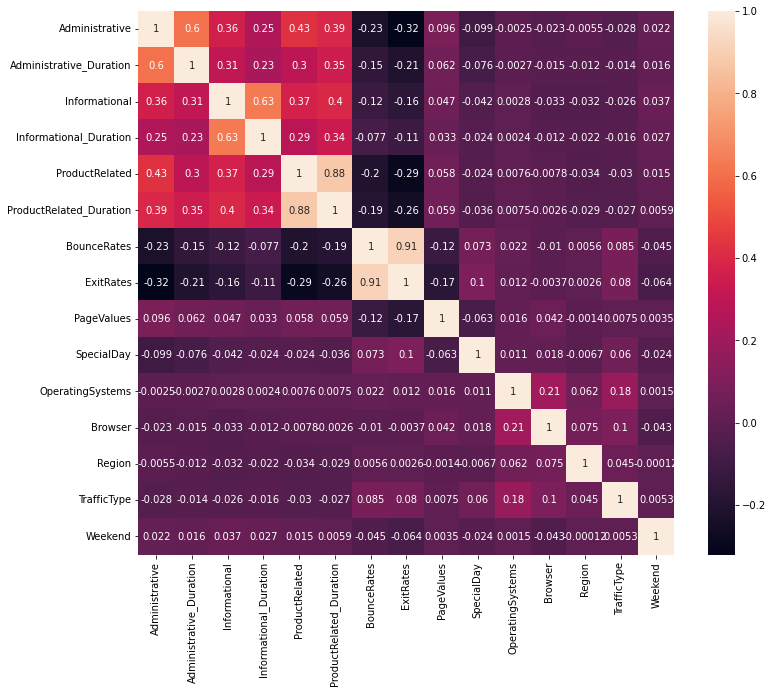

In [27]:
plt.figure(figsize=(12,10))
cor=X_corr.corr()
sns.heatmap(cor, annot=True)
plt.show()

### Feature Selection

In [28]:
#function to find columns correlated and to be removed
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [29]:
corr_feat = correlation(X_corr,0.85)
corr_feat

{'ExitRates', 'ProductRelated_Duration'}

In [30]:
corr_feat = list(corr_feat)
X_train.drop(corr_feat,inplace=True,axis=1)

/home/ashish/Documents/UnfairMeans/UFM_env/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [31]:
X_train.shape

(8631, 17)

In [32]:
y_train.shape

(8631,)

## Mutual Induction to find the best features

In [33]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
# mutual_info = mutual_info_classif(X_train, y_train)
# mutual_info 

In [34]:
# mutual_info = pd.Series(mutual_info)
# mutual_info.index = X_train.columns
# mutual_info.sort_values(ascending=False)

NameError: name 'mutual_info' is not defined

In [35]:
from sklearn.feature_selection import SelectKBest
sel_cols = SelectKBest(mutual_info_classif, k=14)
sel_cols.fit(X_train, y_train)
topk = list(X_train.columns[sel_cols.get_support()])
topk

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'BounceRates',
 'PageValues',
 'SpecialDay',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'Month',
 'VisitorType_Returning_Visitor']

In [36]:
X_train =X_train[topk]
# X_test = X_test[topk]

## Oversampling

In [38]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state =42)
X_train, y_train = smt.fit_resample(X_train,y_train)

In [39]:
##importing griddesarch
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

## KNN-Classifier

In [44]:
from sklearn.neighbors import KNeighborsClassifier
grid_params = {
    'n_neighbors' : [3,5,11,15,19],
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan']
}

knn_grid = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=grid_params,n_jobs=-1,verbose=2,cv=10)
knn_grid.fit(X_train,y_train)
knn_best_para = knn_grid.best_params_
print(knn_best_para)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [43]:
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import make_scorer, f1_score
# K_fold_knn = cross_val_score(knn,X_train, y_train,scoring = make_scorer(f1_score, average='weighted'), cv=10)
knn = KNeighborsClassifier(**knn_best_para)
K_fold_knn = cross_val_score(knn,X_train, y_train, cv=10)
K_fold_knn.mean()

0.8991108071135431

## SVM-Classifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
SVMmodel = SVC()
# from sklearn.model_selection import cross_val_score
K_fold_svm = cross_val_score(SVMmodel,X_train, y_train, cv=10)
K_fold_svm.mean()


0.7363885088919288

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
dt_grid = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=tree_para,n_jobs=-1,verbose=2,cv=10)
dt_grid.fit(X_train,y_train)
dt_best_para = dt_grid.best_params_
print(dt_best_para)


0.9012995896032832

In [ ]:
dtree = DecisionTreeClassifier(**dt_best_para)
# from sklearn.model_selection import cross_val_score
K_fold_dtree = cross_val_score(dtree,X_train, y_train, cv=10)
K_fold_dtree.mean()


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
param_grid = { 
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
    
}
rf_grid = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid,n_jobs=-1,verbose=2,cv=10)
rf_grid.fit(X_train,y_train)
rf_best_para = rf_grid.best_params_
print(rf_best_para)

In [ ]:
rfc = RandomForestClassifier(n_estimators=100)
K_fold_rfc = cross_val_score(rfc,X_train, y_train, cv=10)
K_fold_rfc.mean()


0.9291905439180326

## MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
parameters={ 'learning_rate': ["constant", "invscaling", "adaptive"], 'hidden_layer_sizes': [(100,1), (100,2), (100,3)], 'alpha': [0.01,0.1,0.2,0.02], 'activation': ["logistic", "relu", "Tanh"]}

mlp_grid = GridSearchCV(estimator=MLPClassifier(),param_grid=parameters,n_jobs=-1,verbose=2,cv=2)

mlp_grid.fit(X_train,y_train)

mlp_best_para = mlp_grid.best_params_
print(mlp_best_para)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/shared-

0.8775649794801641

In [ ]:
mlp = MLPClassifier(**mlp_best_para)
K_fold_mlp = cross_val_score(mlp,X_train, y_train, cv=10)
K_fold_mlp.mean()

## Gradient Booster

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
parameters = {#'nthread':[3,4], #when use hyperthread, xgboost may become slower
               "criterion": ["friedman_mse",  "mae"],
              "loss":["deviance","exponential"],
#               "max_features":["log2","sqrt"],
              'learning_rate': [0.01,0.05,0.1], #so called `eta` value
#               'max_depth': [3,4,5],
#               'min_samples_leaf': [4,5,6],

              'subsample': [0.6,0.7,0.8],
#               'n_estimators': [5,10,20],#number of trees, change it to 1000 for better results

              }
gb_grid = GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=parameters,n_jobs=-1,verbose=2,cv=10)
gb_grid.fit(X_train,y_train)
gb_best_para = gb_grid.best_params_
print(gb_best_para)

0.9077975376196991

In [ ]:
gb = GradientBoostingClassifier(**gb_best_para)
K_fold_gb = cross_val_score(gb,X_train, y_train, cv=10)
K_fold_gb.mean()